In [1]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"rizkyely","key":"a76d26afe6e59d40455c73999d68f31c"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d waifuai/cat2dog

 91% 25.0M/27.4M [00:00<00:00, 37.5MB/s]
100% 27.4M/27.4M [00:00<00:00, 55.6MB/s]


In [3]:
!unzip \*.zip &> /dev/null && rm *.zip

In [4]:
%cd /content/cat2dog

%mkdir train_data
%mkdir test_data

%cp -av trainA train_data
%cp -av trainB train_data

%cp -av testA  test_data
%cp -av testB  test_data



/content/cat2dog
'trainA' -> 'train_data/trainA'
'trainA/0.jpg' -> 'train_data/trainA/0.jpg'
'trainA/1.jpg' -> 'train_data/trainA/1.jpg'
'trainA/10.jpg' -> 'train_data/trainA/10.jpg'
'trainA/100.jpg' -> 'train_data/trainA/100.jpg'
'trainA/101.jpg' -> 'train_data/trainA/101.jpg'
'trainA/102.jpg' -> 'train_data/trainA/102.jpg'
'trainA/105.jpg' -> 'train_data/trainA/105.jpg'
'trainA/106.jpg' -> 'train_data/trainA/106.jpg'
'trainA/107.jpg' -> 'train_data/trainA/107.jpg'
'trainA/108.jpg' -> 'train_data/trainA/108.jpg'
'trainA/109.jpg' -> 'train_data/trainA/109.jpg'
'trainA/11.jpg' -> 'train_data/trainA/11.jpg'
'trainA/110.jpg' -> 'train_data/trainA/110.jpg'
'trainA/111.jpg' -> 'train_data/trainA/111.jpg'
'trainA/112.jpg' -> 'train_data/trainA/112.jpg'
'trainA/113.jpg' -> 'train_data/trainA/113.jpg'
'trainA/114.jpg' -> 'train_data/trainA/114.jpg'
'trainA/115.jpg' -> 'train_data/trainA/115.jpg'
'trainA/116.jpg' -> 'train_data/trainA/116.jpg'
'trainA/117.jpg' -> 'train_data/trainA/117.jpg'
'tr

In [5]:
#TRAINING DATA AUGMENTATION

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,shear_range=0.2,zoom_range=0.2, horizontal_flip= True)
training_set = train_datagen.flow_from_directory('/content/cat2dog/train_data' ,target_size=(64, 64),batch_size= 32,class_mode="categorical")

Found 2035 images belonging to 2 classes.


In [6]:
#TEST DATA AUGMENTATION

test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/cat2dog/test_data',target_size= (64,64), batch_size = 32, class_mode = 'categorical')

Found 200 images belonging to 2 classes.


In [7]:
def VGG_16(input_shape = (64, 64, 3), n_classes = 1000):
    
    model = Sequential(
        [
            Conv2D(filters = 64, kernel_size = (3, 3), padding = "same", activation = "relu", input_shape = input_shape),
            Conv2D(filters = 64, kernel_size = (3, 3), padding = "same", activation = "relu"),
            MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
            
            Conv2D(filters = 128, kernel_size = (3, 3), padding = "same", activation = "relu"),
            Conv2D(filters = 128, kernel_size = (3, 3), padding = "same", activation = "relu"),
            MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
            
            Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu"),
            Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu"),
            Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu"),
            MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
            
            Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"),
            Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"),
            Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"),
            MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
            
            Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"),
            Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"),
            Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"),
            MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
            
            Flatten(),
            Dense(units = 4096, activation = "relu"),
            Dense(units = 4096, activation = "relu"),
            Dense(units = n_classes, activation = "softmax")
        ]
    )
    
    return model

In [8]:
import tensorflow as tf
from keras.applications.vgg16 import VGG16, preprocess_input

base_model = VGG16(
    weights = "imagenet", 
    input_shape = (64, 64, 3),
    include_top = False
)


for layers in base_model.layers:
    layers.trainable = False


def vgg16_pretrained():
    
    model = Sequential(
        [
            base_model,
            GlobalAveragePooling2D(),
            Dense(100, activation = "relu"),
            Dropout(0.4),
            Dense(64, activation = "relu"),
            Dense(2, activation = "softmax")
        ]
    )
    
    return model

tf.keras.backend.clear_session()

58900480/58889256 [==============================] - 0s 0us/step


In [9]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, GlobalAveragePooling2D, Dropout, BatchNormalization, Input

model = vgg16_pretrained()

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = "accuracy")

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 100)               51300     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                6464      
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                        

In [10]:
history = model.fit(
    training_set,
    epochs = 100, 
    validation_data = test_set,
)

Epoch 1/100
64/64 [==============================] - 86s 1s/step - loss: 0.3788 - accuracy: 0.8206 - val_loss: 0.2155 - val_accuracy: 0.9200
Epoch 2/100
64/64 [==============================] - 84s 1s/step - loss: 0.2126 - accuracy: 0.9086 - val_loss: 0.1216 - val_accuracy: 0.9650
Epoch 3/100
64/64 [==============================] - 84s 1s/step - loss: 0.1584 - accuracy: 0.9332 - val_loss: 0.1050 - val_accuracy: 0.9700
Epoch 4/100
64/64 [==============================] - 84s 1s/step - loss: 0.1446 - accuracy: 0.9420 - val_loss: 0.1029 - val_accuracy: 0.9550
Epoch 5/100
64/64 [==============================] - 84s 1s/step - loss: 0.1342 - accuracy: 0.9484 - val_loss: 0.1051 - val_accuracy: 0.9600
Epoch 6/100
64/64 [==============================] - 84s 1s/step - loss: 0.1159 - accuracy: 0.9538 - val_loss: 0.0801 - val_accuracy: 0.9800
Epoch 7/100
64/64 [==============================] - 84s 1s/step - loss: 0.1188 - accuracy: 0.9459 - val_loss: 0.1059 - val_accuracy: 0.9500
Epoch 8/100
6

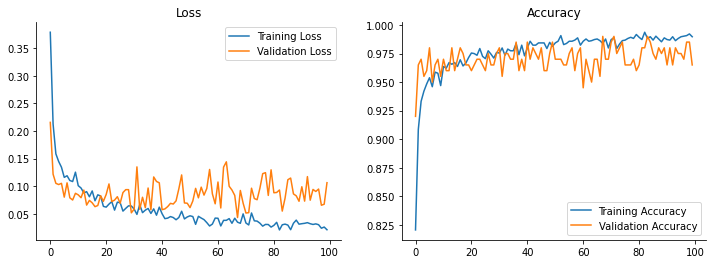

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize = (12, 4))

sns.lineplot(x = range(len(history.history["loss"])), y = history.history["loss"], ax = axes[0], label = "Training Loss")
sns.lineplot(x = range(len(history.history["loss"])), y = history.history["val_loss"], ax = axes[0], label = "Validation Loss")

sns.lineplot(x = range(len(history.history["accuracy"])), y = history.history["accuracy"], ax = axes[1], label = "Training Accuracy")
sns.lineplot(x = range(len(history.history["accuracy"])), y = history.history["val_accuracy"], ax = axes[1], label = "Validation Accuracy")
axes[0].set_title("Loss"); axes[1].set_title("Accuracy")

sns.despine()
plt.show()

[0]
cat


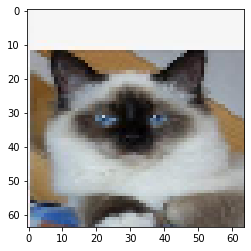

In [13]:
from PIL import Image
from keras.preprocessing import image
import numpy as np

label =  {0:"cat",1:"dog"}
#cat
img_ = image.load_img("/content/cat2dog/cat2dog/testA/104.jpg", target_size=(64, 64))
imag = image.img_to_array(img_)
imag = np.expand_dims(imag, axis=0)
pred = model.predict(imag)
pred = np.argmax(pred,axis=1)
print(pred)
print(label[pred[0]])
plt.imshow(img_)

[1]
dog


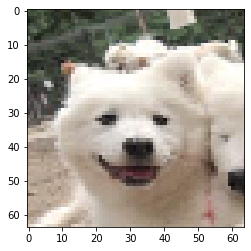

In [14]:
from PIL import Image
from keras.preprocessing import image

label =  {0:"cat",1:"dog"}
#dog
img_ = image.load_img("/content/cat2dog/testB/1095.jpg", target_size=(64, 64))
imag = image.img_to_array(img_)
imag = np.expand_dims(imag, axis=0)
pred = model.predict(imag)
pred = np.argmax(pred,axis=1)
print(pred)
print(label[pred[0]])
plt.imshow(img_)

In [15]:
model.save("cat_dog_classifierr.h5")

In [16]:
from keras.models import load_model
new_model = load_model('cat_dog_classifierr.h5')